## 4.1.2 Analiza zbioru HAM10000

### Import bibliotek i wczytanie danych

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from glob import glob
import os

df = pd.read_csv("./data/raw/HAM10000_metadata.csv")

### Sprawdzenie, ile jest wierszy, typy kolumn oraz podstawowe statystyki numeryczne.

In [2]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10015 entries, 0 to 10014
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   lesion_id     10015 non-null  object 
 1   image_id      10015 non-null  object 
 2   dx            10015 non-null  object 
 3   dx_type       10015 non-null  object 
 4   age           9958 non-null   float64
 5   sex           10015 non-null  object 
 6   localization  10015 non-null  object 
dtypes: float64(1), object(6)
memory usage: 547.8+ KB


,age
count,9958.000000
mean,51.863828
std,16.968614
min,0.000000
25%,40.000000
50%,50.000000
75%,65.000000
max,85.000000


### Sprawdzenie liczby braków w każdej kolumnie oraz duplikaty

In [3]:
print(df.isnull().sum())
print("Duplikaty metadanych:", df.duplicated().sum())

lesion_id        0
image_id         0
dx               0
dx_type          0
age             57
sex              0
localization     0
dtype: int64
Duplikaty metadanych: 0


### Przegląd atrybutów danych.

In [4]:
print("Diagnozy:", df["dx"].unique())
print("Typy potwierdzenia:", df["dx_type"].unique())
print("Wiek:", df["age"].unique())
print("Płeć:", df["sex"].unique())
print("Lokalizacje zmian:", df["localization"].unique())

Diagnozy: ['bkl' 'nv' 'df' 'mel' 'vasc' 'bcc' 'akiec']
Typy potwierdzenia: ['histo' 'consensus' 'confocal' 'follow_up']
Wiek: [80. 75. 60. 70. 55. 85. 65. 40. 50. 45. 35.  0. 30. nan  5. 25. 20. 10.
 15.]
Płeć: ['male' 'female' 'unknown']
Lokalizacje zmian: ['scalp' 'ear' 'face' 'back' 'trunk' 'chest' 'upper extremity' 'abdomen'
 'unknown' 'lower extremity' 'genital' 'neck' 'hand' 'foot' 'acral']


### Ilość przypadków w poszczególnych kategoriach.

In [5]:
print("Diagnozy (dx) – liczba przypadków:")
print(df["dx"].value_counts(), "\n")

print("Typy potwierdzenia diagnozy (dx_type):")
print(df["dx_type"].value_counts(), "\n")

print("Płeć pacjentów (sex):")
print(df["sex"].value_counts(), "\n")

print("Lokalizacja zmian skórnych (localization):")
print(df["localization"].value_counts(), "\n")

print("Rozkład wartości wieku (age)")
print(df["age"].value_counts().sort_index(), "\n")

Diagnozy (dx) – liczba przypadków:
dx
nv       6705
mel      1113
bkl      1099
bcc       514
akiec     327
vasc      142
df        115
Name: count, dtype: int64 

Typy potwierdzenia diagnozy (dx_type):
dx_type
histo        5340
follow_up    3704
consensus     902
confocal       69
Name: count, dtype: int64 

Płeć pacjentów (sex):
sex
male       5406
female     4552
unknown      57
Name: count, dtype: int64 

Lokalizacja zmian skórnych (localization):
localization
back               2192
lower extremity    2077
trunk              1404
upper extremity    1118
abdomen            1022
face                745
chest               407
foot                319
unknown             234
neck                168
scalp               128
hand                 90
ear                  56
genital              48
acral                 7
Name: count, dtype: int64 

Rozkład wartości wieku (age)
age
0.0       39
5.0       86
10.0      41
15.0      77
20.0     169
25.0     247
30.0     464
35.0     753
40.0  

#### Weryfikacja czy każde zdjęcie ma odpowiadający image_id z pliku .csv

In [6]:
meta_df = pd.read_csv("./data/raw/HAM10000_metadata.csv", sep=',')
image_ids_meta = set(meta_df['image_id'].astype(str))

image_paths = glob("./data/raw/HAM10000_images_part_*/ISIC_*.jpg")
image_ids_files = {os.path.splitext(os.path.basename(p))[0] for p in image_paths}

missing_in_meta = image_ids_files - image_ids_meta
missing_images = image_ids_meta - image_ids_files

print(f"Liczba obrazów: {len(image_ids_files)}")
print(f"Liczba wpisów w metadanych: {len(image_ids_meta)}")
print()

if missing_in_meta:
    print("Brak wpisów w metadanych dla plików:")
    for img in sorted(missing_in_meta):
        print("  -", img)
else:
    print("Wszystkie obrazy mają odpowiadające wpisy w metadanych.")

if missing_images:
    print("\nBrak plików dla wpisów metadanych:")
    for img in sorted(missing_images):
        print("  -", img)
else:
    print("Wszystkie wpisy w metadanych mają odpowiadające pliki obrazów.")

Liczba obrazów: 10015
Liczba wpisów w metadanych: 10015

Wszystkie obrazy mają odpowiadające wpisy w metadanych.
Wszystkie wpisy w metadanych mają odpowiadające pliki obrazów.


# Wizualizacja danych

#### Wykres liczby przypadków według diagnozy

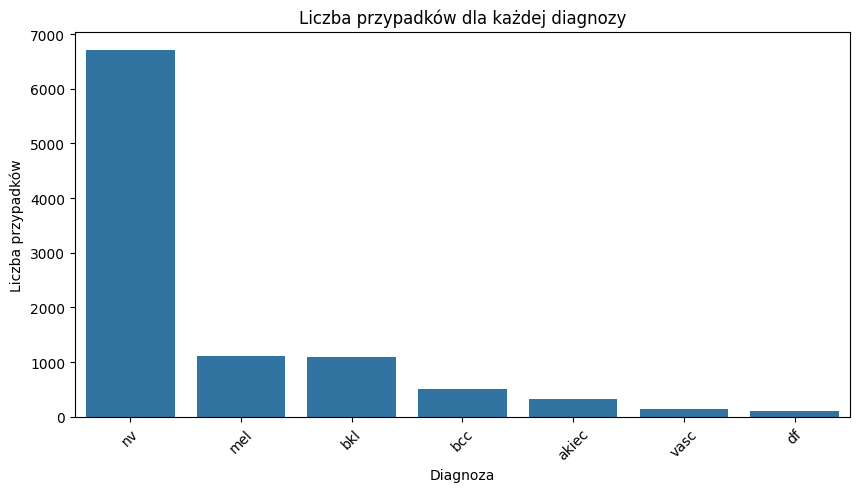

In [7]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x="dx", order=df["dx"].value_counts().index)
plt.title("Liczba przypadków dla każdej diagnozy")
plt.xlabel("Diagnoza")
plt.ylabel("Liczba przypadków")
plt.xticks(rotation=45)
plt.show()

#### Wykres rozkładu typów potwierdzenia diagnozy

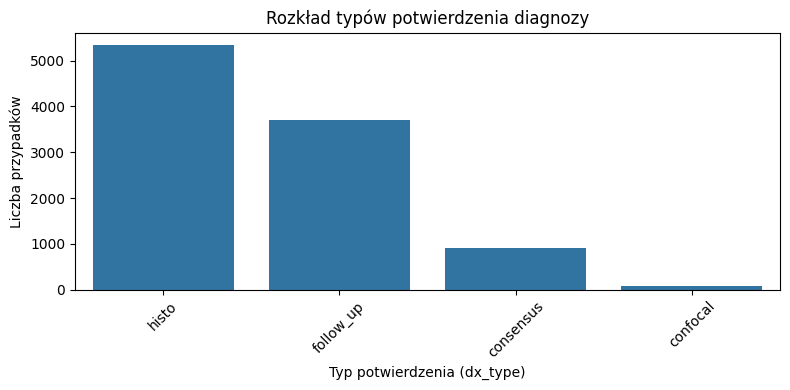

In [8]:
plt.figure(figsize=(8, 4))
sns.countplot(data=df, x="dx_type", order=df["dx_type"].value_counts().index)
plt.title("Rozkład typów potwierdzenia diagnozy")
plt.xlabel("Typ potwierdzenia (dx_type)")
plt.ylabel("Liczba przypadków")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### Histogram wieku

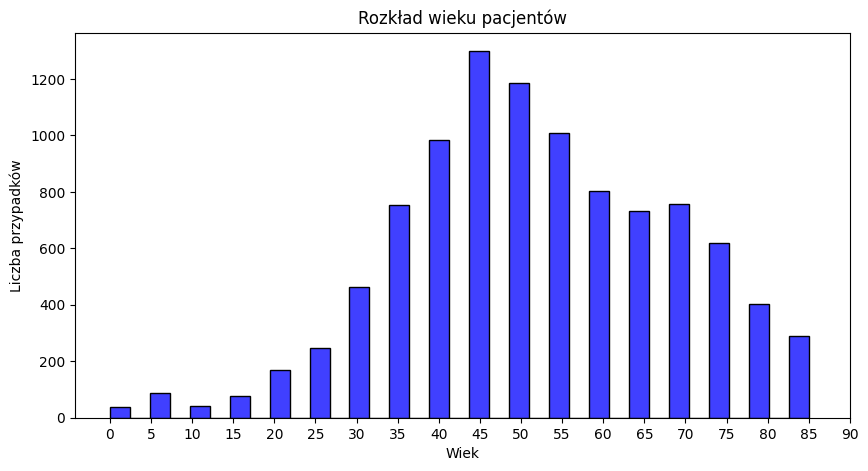

In [9]:
plt.figure(figsize=(10, 5))
sns.histplot(df["age"], bins=35, color="blue")
plt.xticks(range(0, 91, 5))
plt.title("Rozkład wieku pacjentów")
plt.xlabel("Wiek")
plt.ylabel("Liczba przypadków")
plt.show()

#### Wykres liczby przypadków według płci

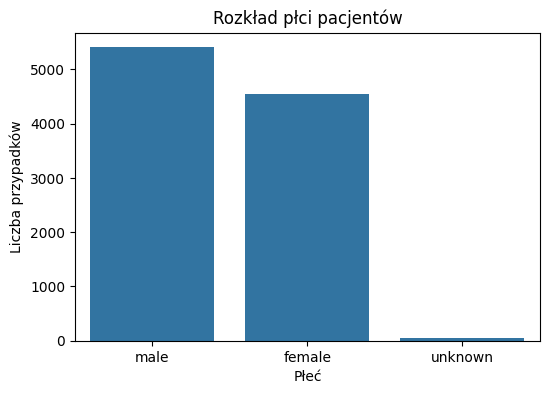

In [10]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x="sex")
plt.title("Rozkład płci pacjentów")
plt.xlabel("Płeć")
plt.ylabel("Liczba przypadków")
plt.show()

#### Wykres liczby przypadków według lokalizacji zmiany

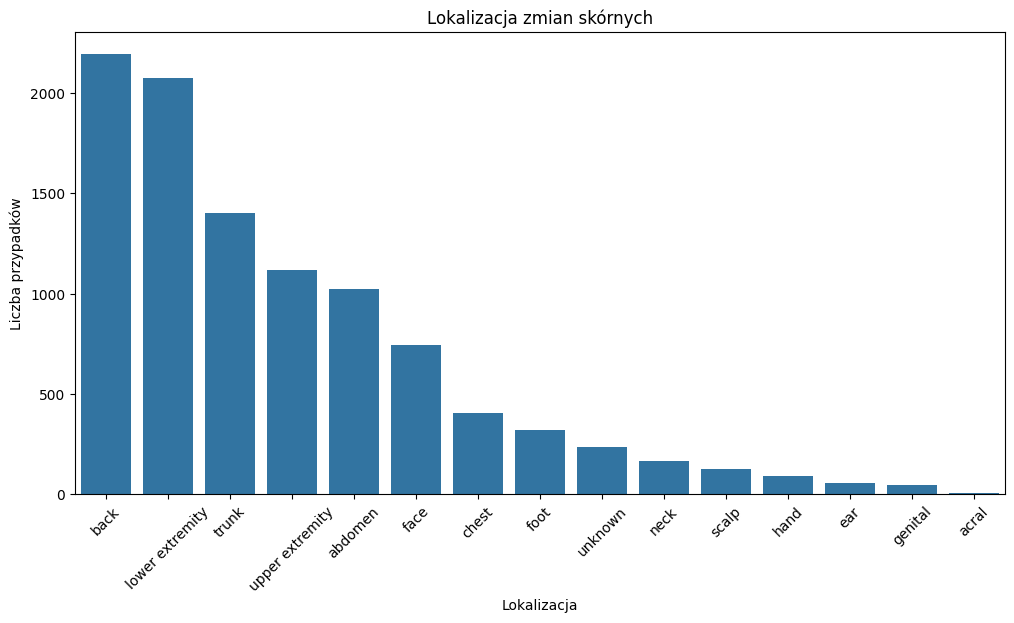

In [11]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x="localization", order=df["localization"].value_counts().index)
plt.title("Lokalizacja zmian skórnych")
plt.xlabel("Lokalizacja")
plt.ylabel("Liczba przypadków")
plt.xticks(rotation=45)
plt.show()